In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
with open("analysis/seeded-ipd.pickle", "rb") as f:
    data = pickle.load(f)

In [5]:
weight_df = pd.DataFrame(
    [
        ["train", seeder, proportion, w]
        for (seeder, proportion), weights in data["train_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ]
    + [
        ["test", seeder, proportion, w]
        for (seeder, proportion), weights in data["test_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ],
    columns=["phase", "seeded_by", "seed_proportion", "weight"],
)

weight_df

,phase,seeded_by,seed_proportion,weight
0,train,TitForTat,0.05,1.0
1,train,TitForTat,0.05,1.0
2,train,TitForTat,0.05,1.0
3,train,TitForTat,0.05,1.0
4,train,TitForTat,0.05,1.0
...,...,...,...,...
13004795,test,Pavlov,0.50,1.0
13004796,test,Pavlov,0.50,0.5
13004797,test,Pavlov,0.50,1.0
13004798,test,Pavlov,0.50,1.0


(0.0, 1.0)

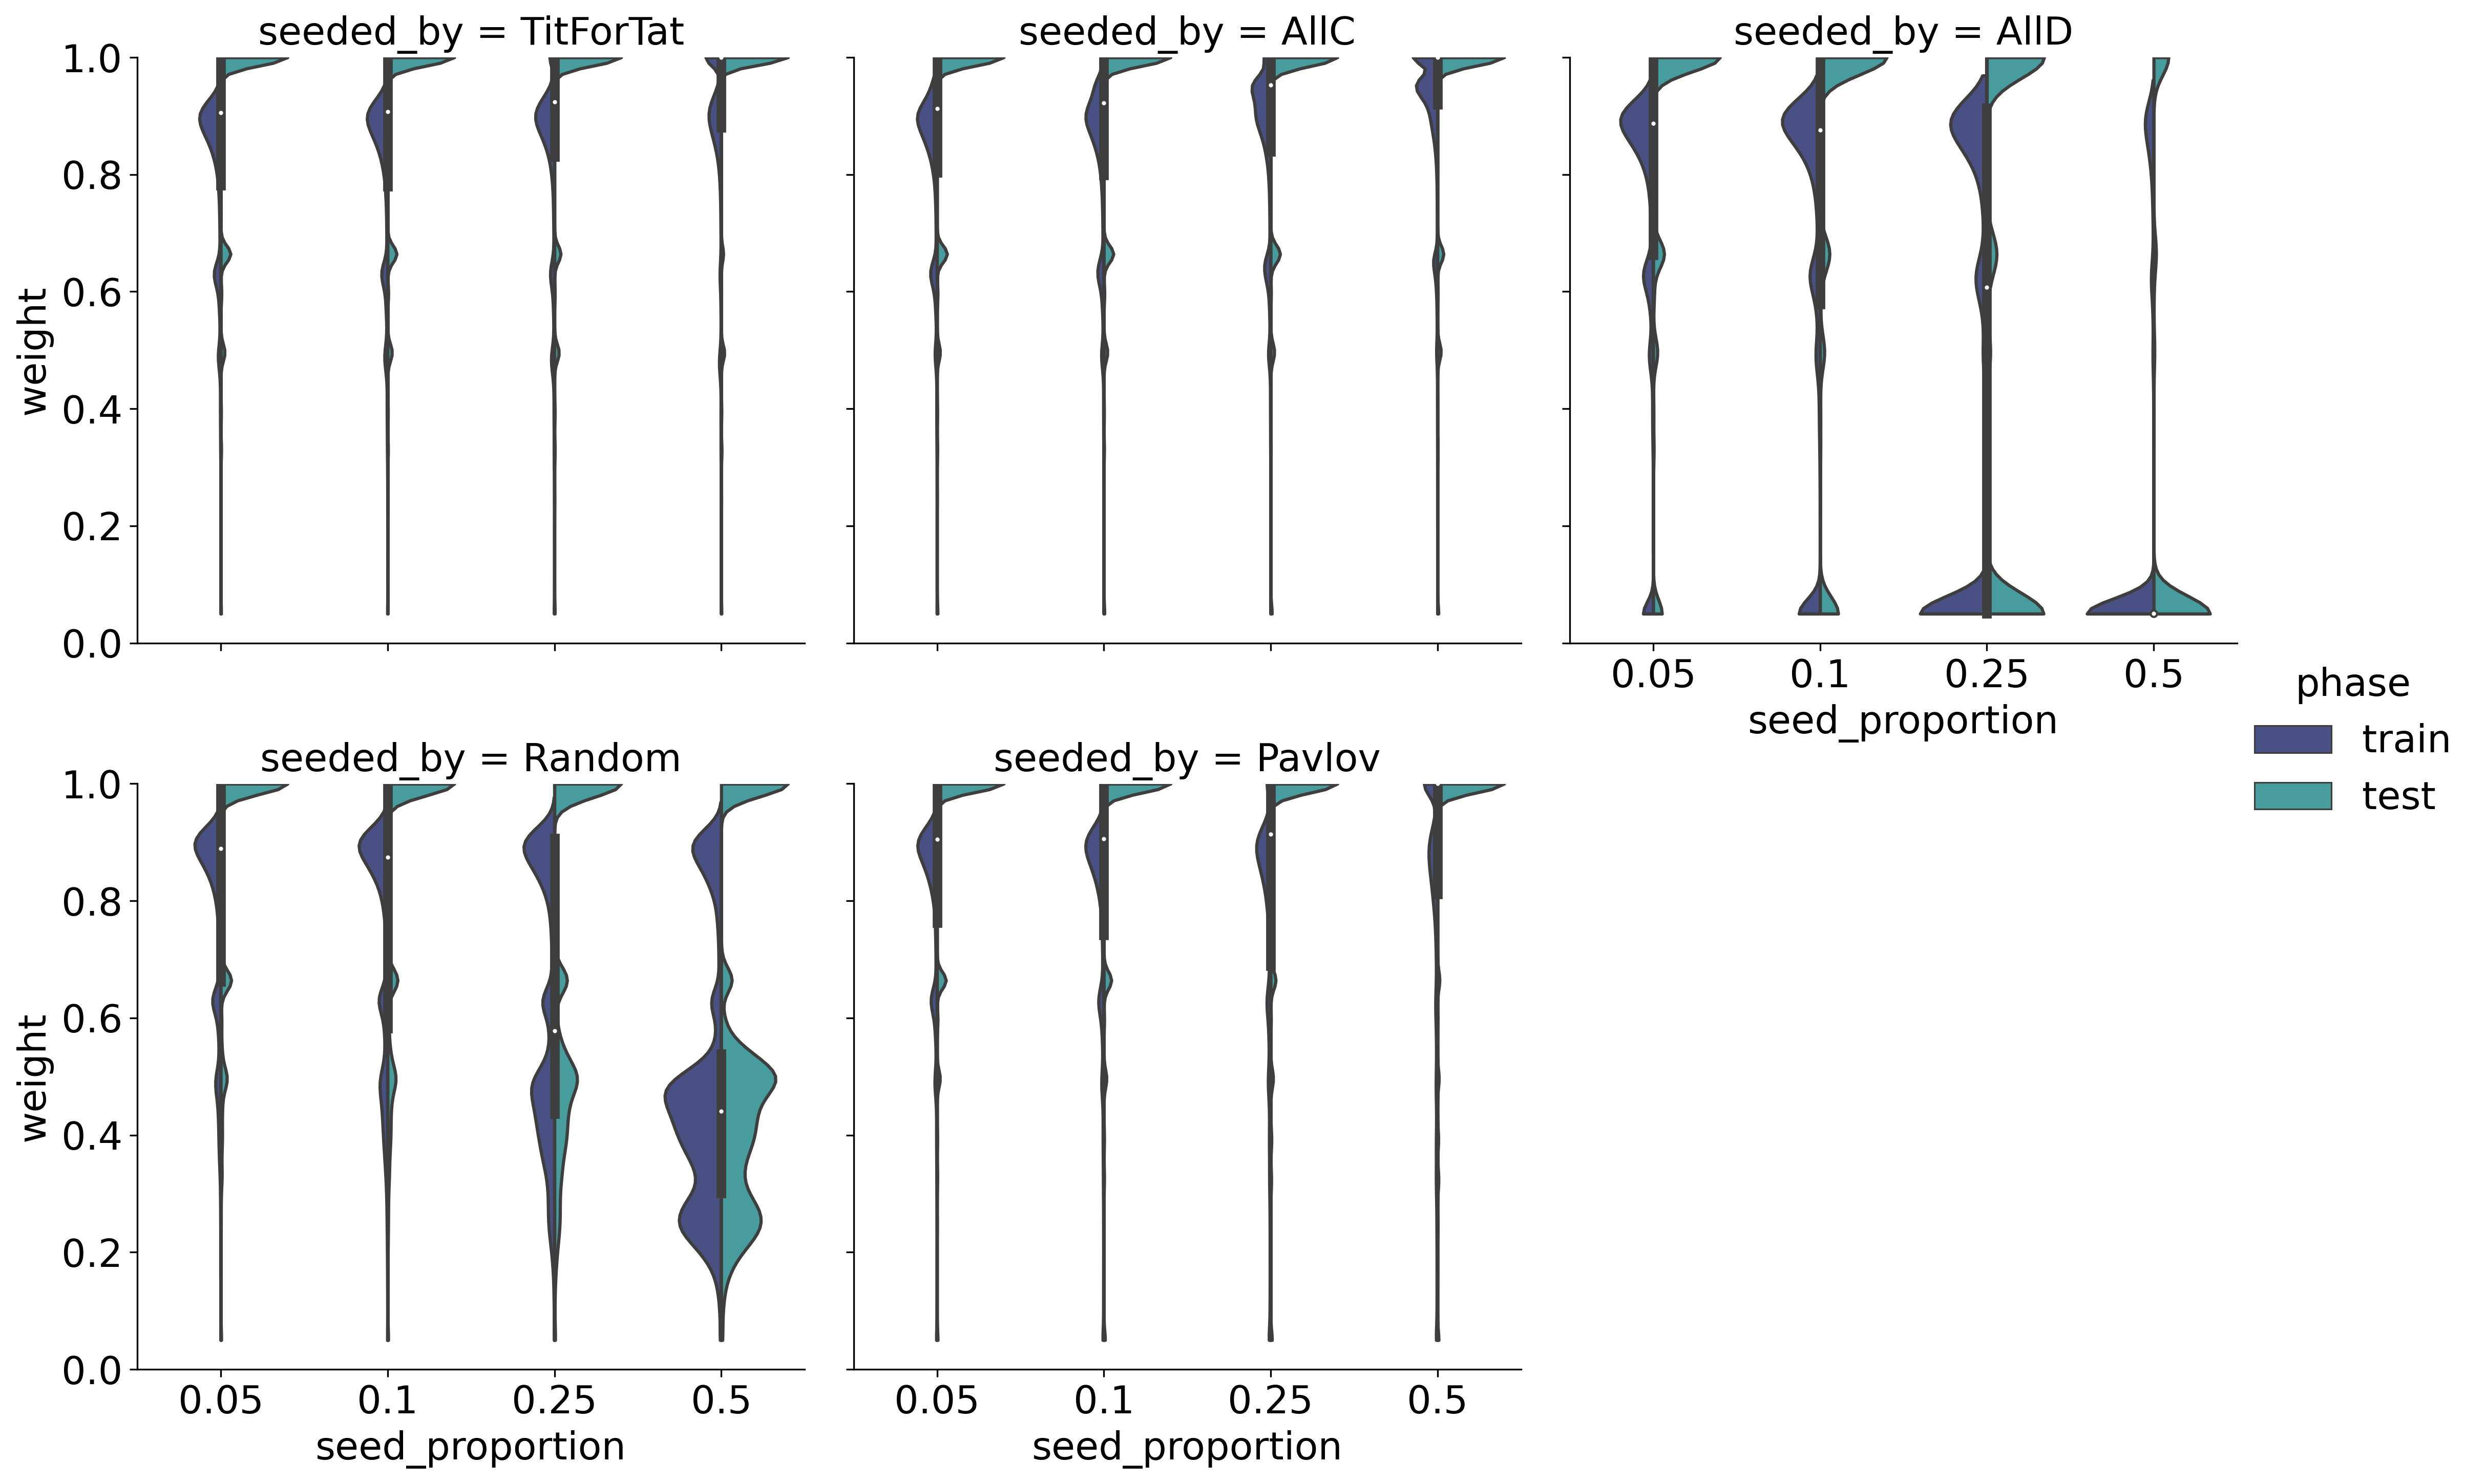

In [6]:
sns.catplot(
    data=weight_df,
    x="seed_proportion",
    y="weight",
    hue="phase",
    col="seeded_by",
    palette="mako",
    col_wrap=3,
    kind="violin",
    cut=0,
    split=True,
)

plt.ylim(0.0, 1.0)

In [7]:
reward_df = pd.DataFrame(
    [
        ["train", seeder, proportion, reward]
        for (seeder, proportion), rewards in data["train_mean_reward"].items()
        for reward in rewards
    ]
    + [
        ["test", seeder, proportion, reward]
        for (seeder, proportion), rewards in data["test_mean_reward"].items()
        for reward in rewards
    ],
    columns=["phase", "seeded_by", "seed_proportion", "mean_reward"],
)

reward_df

,phase,seeded_by,seed_proportion,mean_reward
0,train,TitForTat,0.05,2.883817
1,train,TitForTat,0.05,2.893549
2,train,TitForTat,0.05,2.886120
3,train,TitForTat,0.05,2.878240
4,train,TitForTat,0.05,2.886702
...,...,...,...,...
795,test,Pavlov,0.50,2.969383
796,test,Pavlov,0.50,2.981302
797,test,Pavlov,0.50,2.985121
798,test,Pavlov,0.50,2.966438


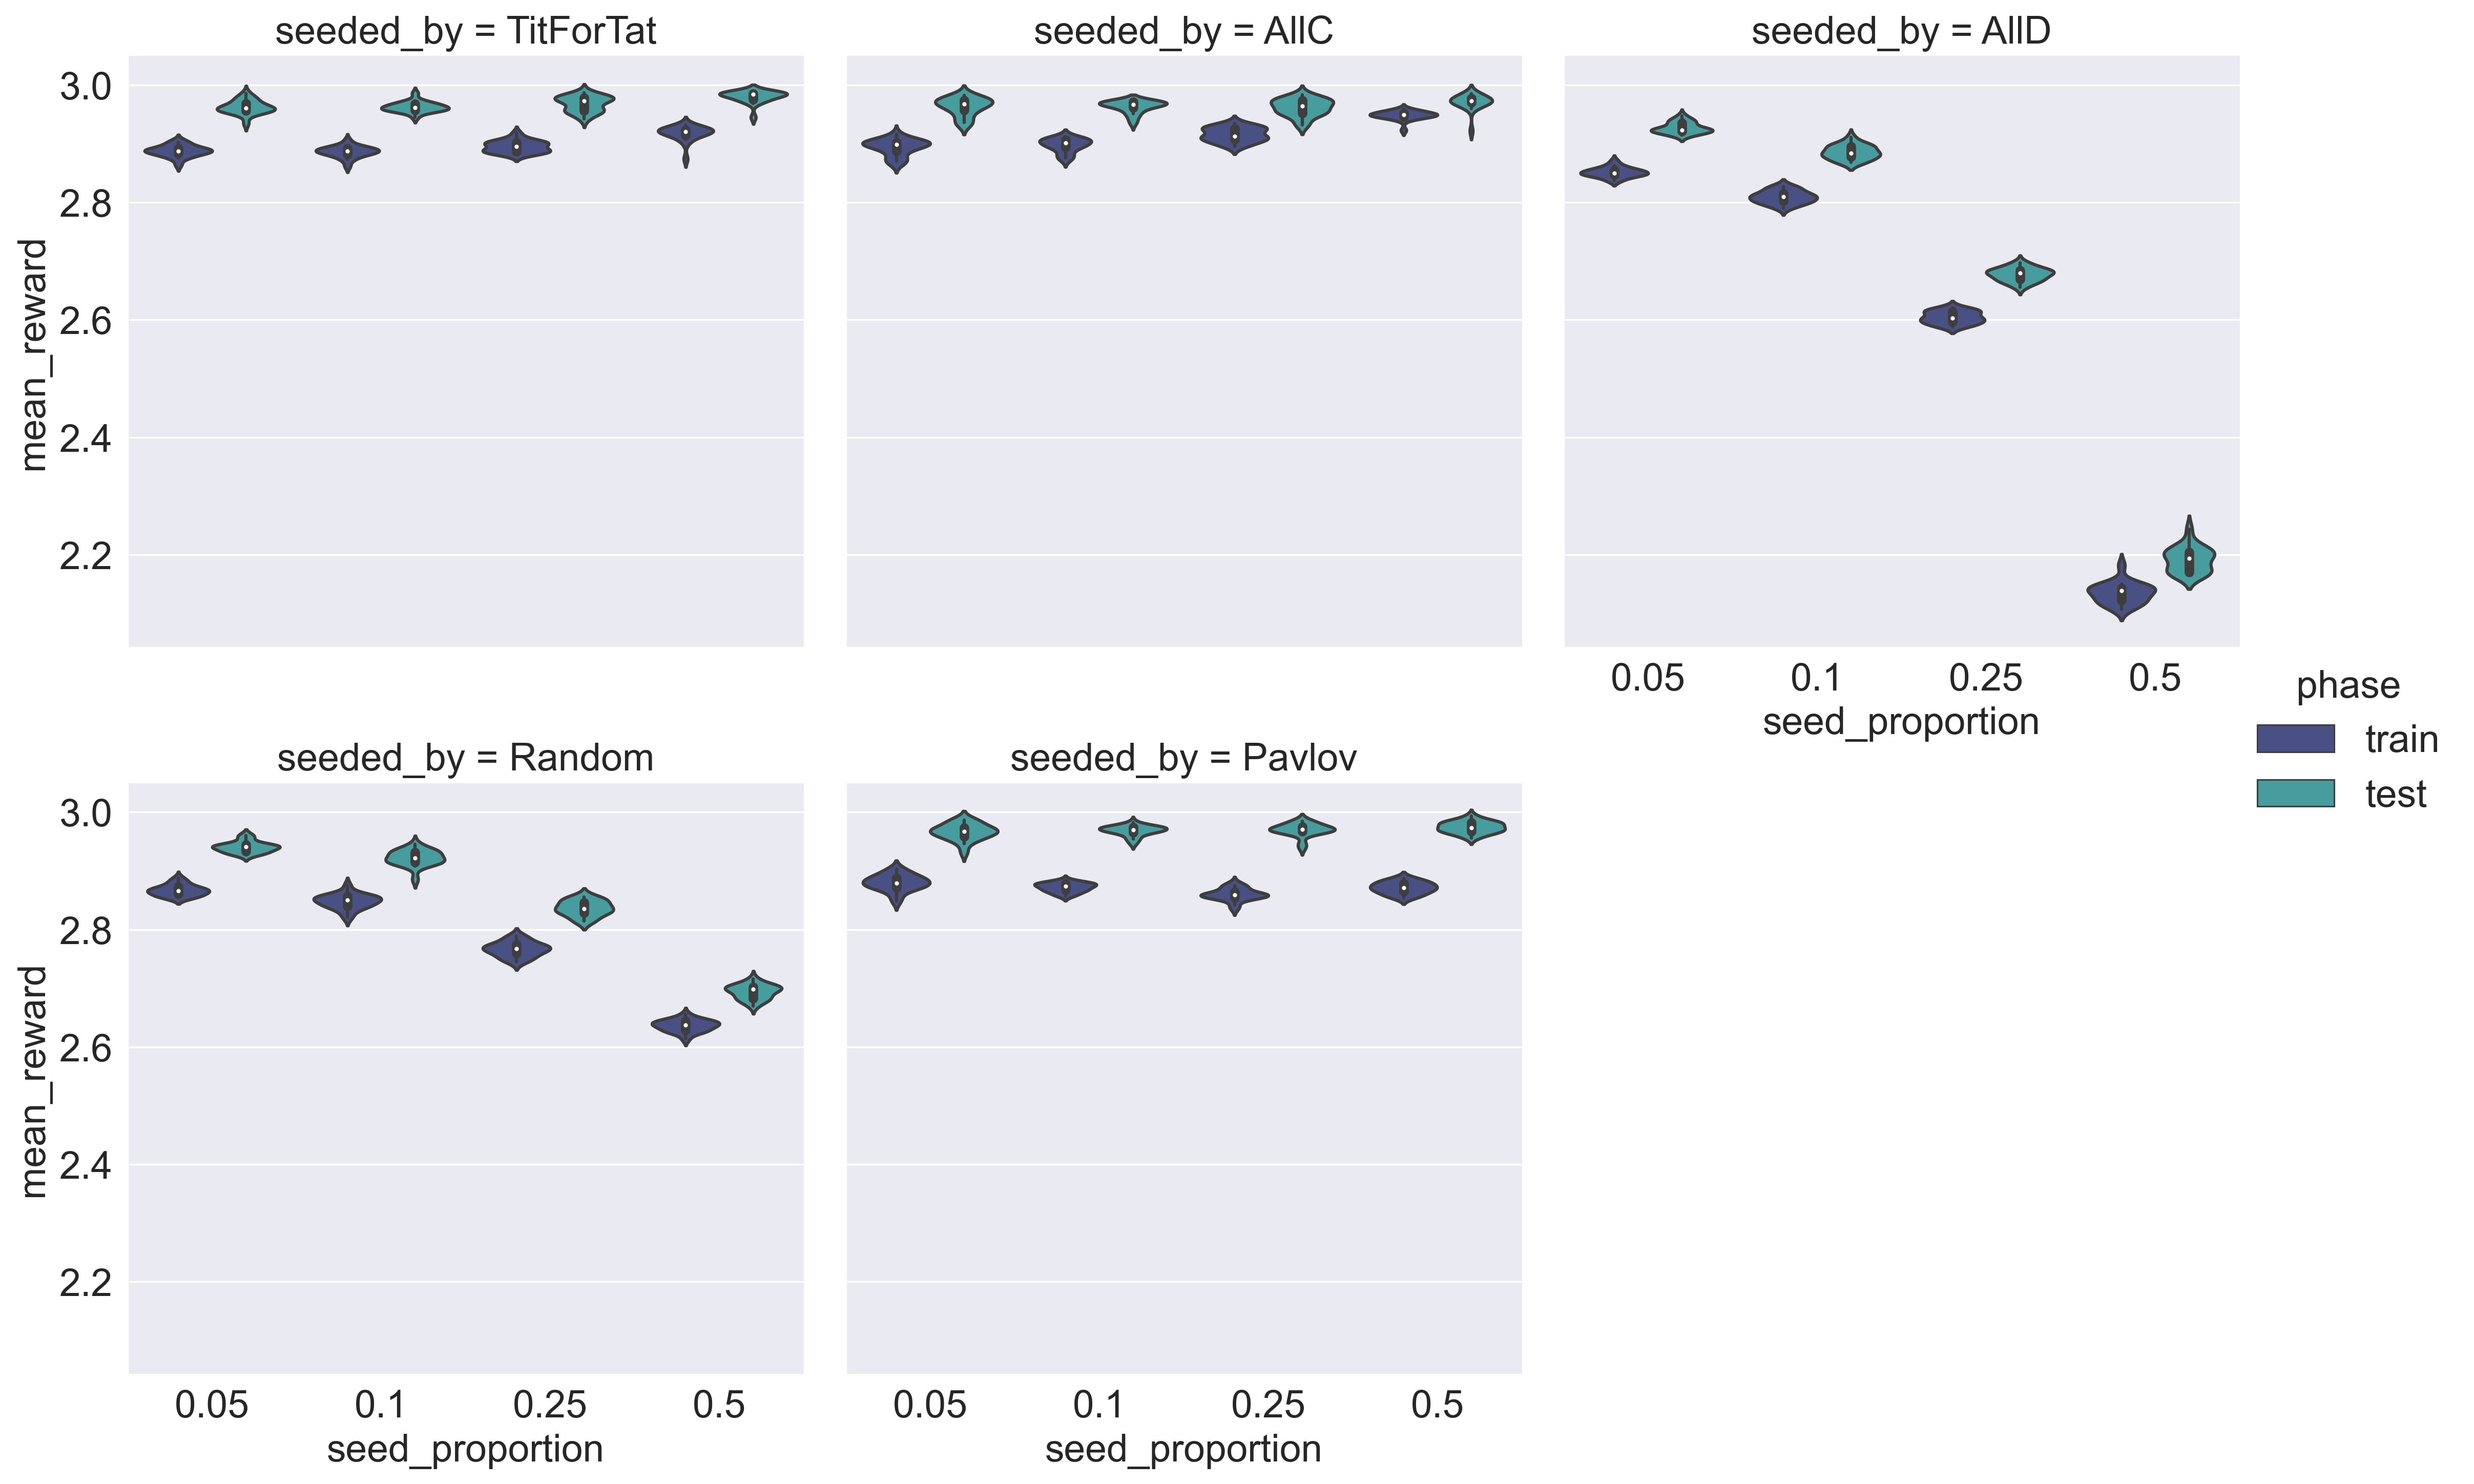

In [8]:
sns.set_style("darkgrid")

sns.catplot(
    reward_df,
    x="seed_proportion",
    y="mean_reward",
    col="seeded_by",
    col_wrap=3,
    hue="phase",
    palette="mako",
    kind="violin",
)

In [10]:
agg_df = reward_df.groupby(["phase", "seeded_by", "seed_proportion"]).agg(
    {"mean_reward": ["mean", "std"]}
)

agg_df

mean_reward          
                                       mean       std
phase seeded_by seed_proportion                      
test  AllC      0.05               2.963310  0.015098
                0.10               2.963117  0.010466
                0.25               2.961855  0.014200
                0.50               2.970962  0.013475
      AllD      0.05               2.927045  0.009354
                0.10               2.885477  0.011890
                0.25               2.677297  0.011052
                0.50               2.191657  0.021043
      Pavlov    0.05               2.966410  0.013691
                0.10               2.968493  0.008535
                0.25               2.969765  0.010980
                0.50               2.974290  0.009591
      Random    0.05               2.940743  0.009235
                0.10               2.922064  0.013208
                0.25               2.836301  0.012928
                0.50               2.693976  0.012011
      TitForTat 0.05               2.962315  0.011413
                0.10               2.962501  0.008530
                0.25               2.968079  0.012885
                0.50               2.980149  0.010174
train AllC      0.05               2.894038  0.013607
                0.10               2.897330  0.011517
                0.25               2.915719  0.011725
                0.50               2.948193  0.007618
      AllD      0.05               2.851286  0.008172
                0.10               2.809268  0.010619
                0.25               2.604255  0.010263
                0.50               2.134659  0.017441
      Pavlov    0.05               2.879814  0.013506
                0.10               2.871688  0.007536
                0.25               2.859702  0.010219
                0.50               2.871131  0.009832
      Random    0.05               2.866973  0.009424
                0.10               2.847915  0.012237
                0.25               2.766600  0.012281
                0.50               2.636300  0.009920
      TitForTat 0.05               2.887664  0.009534
                0.10               2.886288  0.009459
                0.25               2.895209  0.009843
                0.50               2.917772  0.012618

In [11]:
pivoted_df = (
    agg_df.reset_index()
    .pivot(["phase", "seeded_by"], columns="seed_proportion")
    .reset_index()
)

pivoted_df

C:\Users\jerem\AppData\Local\Temp/ipykernel_24096/499541680.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_df = agg_df.reset_index().pivot(["phase", "seeded_by"], columns="seed_proportion").reset_index()


phase  seeded_by mean_reward                                \
                                         mean                                 
seed_proportion                          0.05       0.1      0.25       0.5   
0                 test       AllC    2.963310  2.963117  2.961855  2.970962   
1                 test       AllD    2.927045  2.885477  2.677297  2.191657   
2                 test     Pavlov    2.966410  2.968493  2.969765  2.974290   
3                 test     Random    2.940743  2.922064  2.836301  2.693976   
4                 test  TitForTat    2.962315  2.962501  2.968079  2.980149   
5                train       AllC    2.894038  2.897330  2.915719  2.948193   
6                train       AllD    2.851286  2.809268  2.604255  2.134659   
7                train     Pavlov    2.879814  2.871688  2.859702  2.871131   
8                train     Random    2.866973  2.847915  2.766600  2.636300   
9                train  TitForTat    2.887664  2.886288  2.895209  2.917772   

                                                         
                      std                                
seed_proportion      0.05       0.1      0.25       0.5  
0                0.015098  0.010466  0.014200  0.013475  
1                0.009354  0.011890  0.011052  0.021043  
2                0.013691  0.008535  0.010980  0.009591  
3                0.009235  0.013208  0.012928  0.012011  
4                0.011413  0.008530  0.012885  0.010174  
5                0.013607  0.011517  0.011725  0.007618  
6                0.008172  0.010619  0.010263  0.017441  
7                0.013506  0.007536  0.010219  0.009832  
8                0.009424  0.012237  0.012281  0.009920  
9                0.009534  0.009459  0.009843  0.012618

In [13]:
for _, row in pivoted_df[pivoted_df["phase"] == "train"].iterrows():
    print(
        row["seeded_by"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

AllC	&	$2.894 \pm 0.014$	&	$2.897 \pm 0.012$	&	$2.916 \pm 0.012$	&	$2.948 \pm 0.008$ \\
AllD	&	$2.851 \pm 0.008$	&	$2.809 \pm 0.011$	&	$2.604 \pm 0.010$	&	$2.135 \pm 0.017$ \\
Pavlov	&	$2.880 \pm 0.014$	&	$2.872 \pm 0.008$	&	$2.860 \pm 0.010$	&	$2.871 \pm 0.010$ \\
Random	&	$2.867 \pm 0.009$	&	$2.848 \pm 0.012$	&	$2.767 \pm 0.012$	&	$2.636 \pm 0.010$ \\
TitForTat	&	$2.888 \pm 0.010$	&	$2.886 \pm 0.009$	&	$2.895 \pm 0.010$	&	$2.918 \pm 0.013$ \\


In [14]:
for _, row in pivoted_df[pivoted_df["phase"] == "test"].iterrows():
    print(
        row["seeded_by"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

AllC	&	$2.963 \pm 0.015$	&	$2.963 \pm 0.010$	&	$2.962 \pm 0.014$	&	$2.971 \pm 0.013$ \\
AllD	&	$2.927 \pm 0.009$	&	$2.885 \pm 0.012$	&	$2.677 \pm 0.011$	&	$2.192 \pm 0.021$ \\
Pavlov	&	$2.966 \pm 0.014$	&	$2.968 \pm 0.009$	&	$2.970 \pm 0.011$	&	$2.974 \pm 0.010$ \\
Random	&	$2.941 \pm 0.009$	&	$2.922 \pm 0.013$	&	$2.836 \pm 0.013$	&	$2.694 \pm 0.012$ \\
TitForTat	&	$2.962 \pm 0.011$	&	$2.963 \pm 0.009$	&	$2.968 \pm 0.013$	&	$2.980 \pm 0.010$ \\
